# Logistic Regression - Heart Disease Prediction

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv("framingham_heart_disease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Since the Education column has no effect on Heart Disease , we can drop that column

In [3]:
data = data.drop("education",axis=1)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Handling Missing values

In [4]:
features_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>0]
for feature in features_with_nan:
    print("{} : {}% Missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

cigsPerDay : 0.0068% Missing values
BPMeds : 0.0125% Missing values
totChol : 0.0118% Missing values
BMI : 0.0045% Missing values
heartRate : 0.0002% Missing values
glucose : 0.0916% Missing values


### We replace the Missing values of the Median of each feature

In [5]:
def replace_nan(data,features_with_nan):
    dataset = data.copy()
    for feature in features_with_nan:
        median_value = dataset[feature].median() #Median of each feature
        
        dataset[feature+"_nan"] = np.where(dataset[feature].isnull(),1,0)
        dataset[feature].fillna(median_value,inplace=True)
    return dataset

In [6]:
data = replace_nan(data,features_with_nan)
data[features_with_nan].isnull().sum()

cigsPerDay    0
BPMeds        0
totChol       0
BMI           0
heartRate     0
glucose       0
dtype: int64

In [7]:
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_nan,BPMeds_nan,totChol_nan,BMI_nan,heartRate_nan,glucose_nan
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,0,0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0,0,0,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,0,0,0,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,0,0,0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,0,0,0,0,0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1,0,0,0,0,0,0
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0,0,0,0,0,0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0,0,0,0,0,0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0,0,0,0,0,0,0


## We can analyze the distribution of the data for each feature

In [8]:
continous_feature = [feature for feature in data.columns if len(data[feature].unique())>25 ]
data[continous_feature].head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


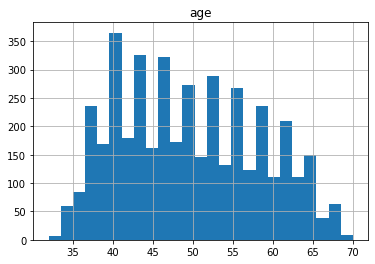

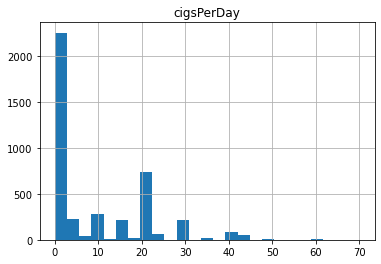

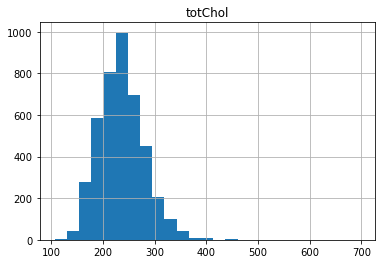

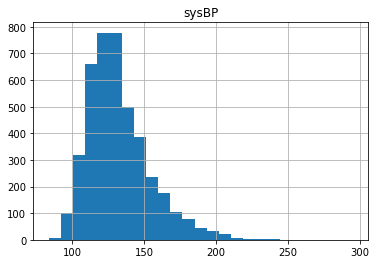

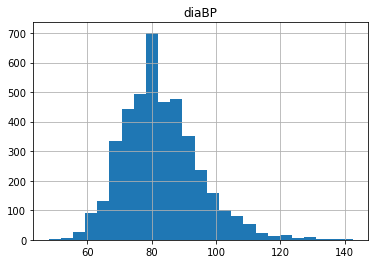

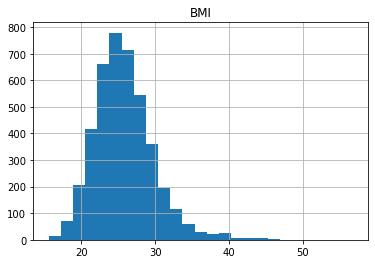

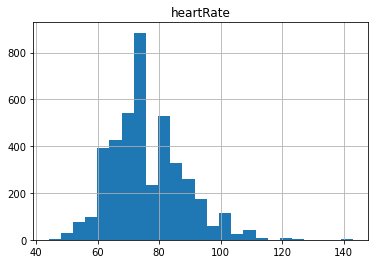

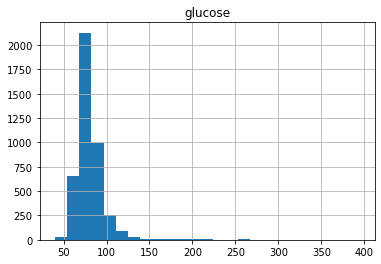

In [9]:
for feature in continous_feature:
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

### We can see the Distribution is not Normalized. So we are going to perform Log transformation to convert them into Normal Distribution

In [10]:
def normalize(data,continous_feature):
    for feature in continous_feature:
    
        if 0 in data[feature].unique():
            pass
        else:
            data[feature] = np.log(data[feature])
    return data

In [11]:
data = normalize(data,continous_feature)

In [12]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_nan,BPMeds_nan,totChol_nan,BMI_nan,heartRate_nan,glucose_nan
0,1,3.663562,0,0.0,0.0,0,0,0,5.273000,4.663439,4.248495,3.294725,4.382027,4.343805,0,0,0,0,0,0,0
1,0,3.828641,0,0.0,0.0,0,0,0,5.521461,4.795791,4.394449,3.357942,4.553877,4.330733,0,0,0,0,0,0,0
2,1,3.871201,1,20.0,0.0,0,0,0,5.501258,4.848116,4.382027,3.232384,4.317488,4.248495,0,0,0,0,0,0,0
3,0,4.110874,1,30.0,0.0,0,1,0,5.416100,5.010635,4.553877,3.352707,4.174387,4.634729,1,0,0,0,0,0,0
4,0,3.828641,1,23.0,0.0,0,0,0,5.652489,4.867534,4.430817,3.139833,4.442651,4.442651,0,0,0,0,0,0,0


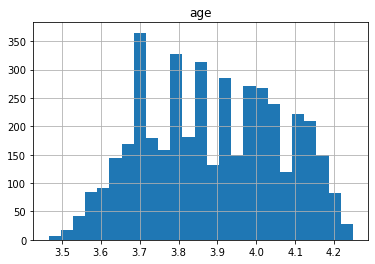

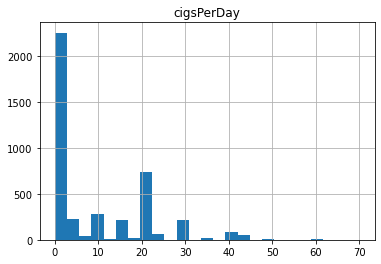

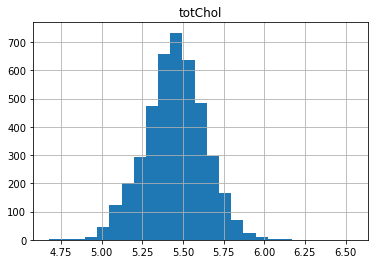

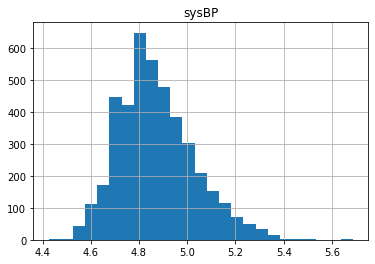

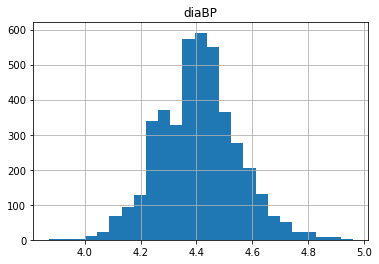

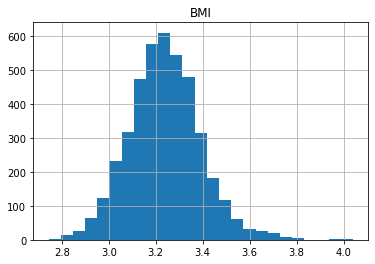

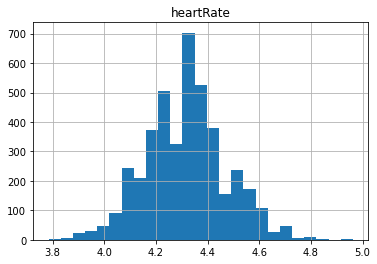

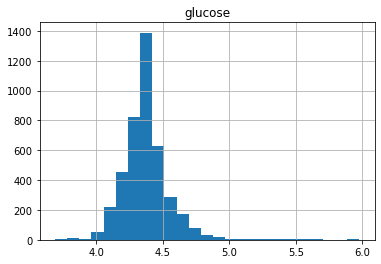

In [16]:
for feature in continous_feature:
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

### We can see that now all the data is normalized. This helps us improve the accuracy of our model

### Seperating Independent and Dependent variables

In [19]:
X = data.drop("TenYearCHD",axis = 1)
Y = data["TenYearCHD"] 
X = np.array(X)
Y = np.array(Y)

## Importing Logistic regression from Sklearn

In [20]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
 X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 1,test_size = 0.2)

In [22]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

D:\SD\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
print (classification_report(y_test, y_pred)) 

Accuracy :  0.8679245283018868
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       733
           1       0.67      0.05      0.10       115

    accuracy                           0.87       848
   macro avg       0.77      0.52      0.51       848
weighted avg       0.84      0.87      0.82       848

